In [11]:
import numpy.random as rand
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.stats import t, norm, laplace, gamma, beta, pareto
%matplotlib inline

In this notebook, we're going to go through some of the more important continuous distributions. The objective is to learn what they look like and how when to use them.

The shape of probability distributions is usually controlled by several parameters. 
The <b>location</b> parameter is used to 'shift' the distribution. Examples of locations parameters are: mean, median, mode. The <b>scale</b> parameter controls how spreaded out the distribution is (standard deviation, variance).

###1. Gaussian (normal) distribution
The Gaussian distribution is the most widely used distribution in statistics. Its shape is controlled by 2 parameters: mean and variance. The (univariate) probability density function is given by:
$ \mathcal{N}(x|\ \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} exp(-\frac{(x-\mu)^2}{2\sigma^2})$

We're going to plot the univariate and bivariate normal distributions.

In [12]:
def plot_univariate(x):
    y = mlab.normpdf(x, 0, 1)
    plt.plot(x, y, 'blue')
    plt.show()

In [13]:
def plot_bivariate(x1, x2):
    x1, x2 = np.meshgrid(x1, x2)
    y = mlab.bivariate_normal(x1, x2, 1.0, 1.0, 0.0, 0.0, 0.0)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(x1, x2, y, rstride = 2, cstride = 2, cmap=cm.coolwarm)
    plt.show()

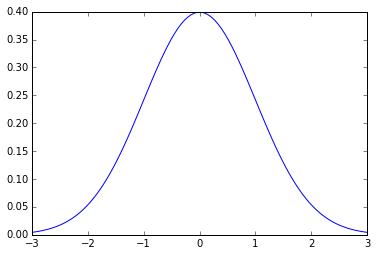

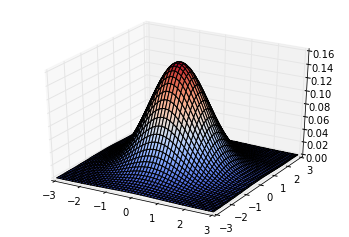

In [14]:
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
plot_univariate(x1)
plot_bivariate(x1, x2)

###2. Student-t distribution



The Gaussian is sensitive to outliers, as we will see in section 2.3.
A more robust solution is the student-t distribution, which has the (ugly) form:
$ p(x\mid \nu,\mu,\sigma) = \frac{\Gamma(\frac{\nu + 1}{2})}{\Gamma(\frac{\nu}{2})\sqrt{\pi\nu}\sigma} \left(1+\frac{1}{\nu}\left(\frac{x-\mu}{\sigma}\right)^2\right)^{-\frac{\nu+1}{2}} $

The $\nu$ parameter is called degrees of freedom and controls the shape of the distribution.

$\sigma$ does not refer to a standard deviation. It is a scaling parameter that is equal to $\frac{s}{\sqrt{n}} $, where $s^2$ is the unbiased variance of the data.

####2.1 Student-t versus Gaussian
We plot the St($\mu = 0, \sigma = 1, \nu = 1$) against $\mathcal{N}(\mu = 0, \sigma^2 = 1) $. 

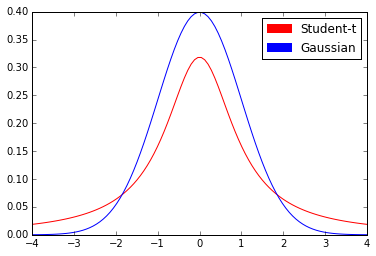

In [15]:
x = np.linspace(-4, 4, 100)
red_patch = mpatches.Patch(color='red', label='Student-t')
blue_patch = mpatches.Patch(color='blue', label='Gaussian')
plt.legend(handles=[red_patch, blue_patch])

plt.plot(x, t.pdf(x, 1), 'red')
plt.plot(x, norm.pdf(x), 'blue')
plt.show()

Notice that the Student-t distribution has longer tails.

####2.2 Student-t for various values of $\nu$ 

We plot the Student-t distribution for various values of $\nu$. For $\nu \geqslant 5$, the distribution quickly approaches a Gaussian.

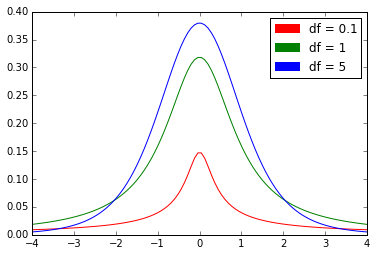

In [16]:
x = np.linspace(-4, 4, 100)
red_patch = mpatches.Patch(color='red', label='df = 0.1')
green_patch = mpatches.Patch(color='green', label='df = 1')
blue_patch = mpatches.Patch(color='blue', label='df = 5')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.plot(x, t.pdf(x, 1), 'green')
plt.plot(x, t.pdf(x, 0.1), 'red')
plt.plot(x, t.pdf(x, 5), 'blue')
plt.show()

####2.3 Outliers
We fit a Gaussian and a student-t distribution on two datasets: the first dataset is normally distributed around 0 and the extended dataset has some extra outliers. 

In [17]:
#create dataset of size 30
data = (np.random.rand(30) - 0.5) * 4 
#add outliers
ext_data = np.concatenate((data, [8, 8.75, 9.5]))

#compute sufficient statistics 
mean = np.mean(data)
std = np.std(data)
mean_ext = np.mean(ext_data)
std_ext = np.std(ext_data)

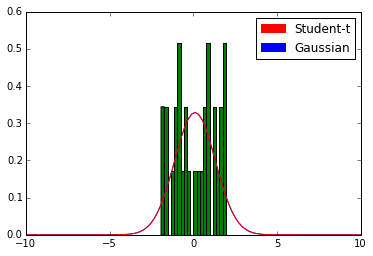

In [21]:
#fit a Gaussian and a student-t distribution on the original dataset
red_patch = mpatches.Patch(color='red', label='Student-t')
blue_patch = mpatches.Patch(color='blue', label='Gaussian')
plt.legend(handles=[red_patch, blue_patch])
plt.hist(data, bins = 20, normed = True, color = 'green')
x = np.linspace(-10, 10, 100)
shape, _, _ = t.fit(data)

plt.plot(x, norm.pdf(x, mean, std), 'blue')
plt.plot(x, t.pdf(x, shape, loc = mean, scale = std), 'red')
plt.show()

The two distributions fit almost identically on the first dataset.

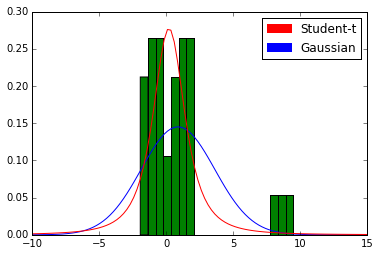

In [25]:
#fit a Gaussian and a student-t distribution on the extended dataset (with outliers)
red_patch = mpatches.Patch(color='red', label='Student-t')
blue_patch = mpatches.Patch(color='blue', label='Gaussian')
plt.legend(handles=[red_patch, blue_patch])
plt.hist(ext_data, bins = 20, normed = True, color = 'green')
x = np.linspace(-10, 15, 100)
shape, loc, scale = t.fit(ext_data)

plt.plot(x, norm.pdf(x, mean_ext, std_ext), 'blue')
plt.plot(x, t.pdf(x, shape, loc, scale), 'red')
plt.show()

As we can see, student-t is less sensitive to outliers.

### 3. Laplace distribution

Another distribution with heavy tails is the Laplace distribution, which has the following probability density function:

$ f(x\mid\mu,b) = \frac{1}{2b} \exp \left( -\frac{|x-\mu|}{b} \right) \ $

u is the mean and b is a scale parameter.

In [27]:
#Fit the Gaussian, Student-t and Laplace on the normal data
x = np.linspace(-10, 10, 100)
loc_norm, scale_norm = norm.fit(data)
loc_lap, scale_lap = laplace.fit(data)
shape_t, loc_t, scale_t = t.fit(data)

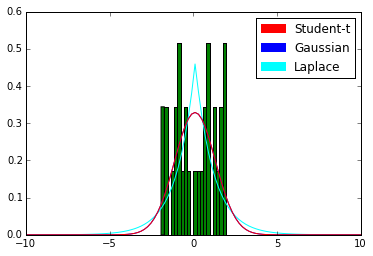

In [28]:
red_patch = mpatches.Patch(color='red', label='Student-t')
blue_patch = mpatches.Patch(color='blue', label='Gaussian')
cyan_patch = mpatches.Patch(color='cyan', label='Laplace')
plt.legend(handles=[red_patch, blue_patch, cyan_patch])
plt.hist(data, bins = 20, normed = True, color = 'green')
plt.plot(x, laplace.pdf(x, loc_lap, scale_lap), 'cyan')
plt.plot(x, norm.pdf(x, loc_norm, scale_norm), 'blue')
plt.plot(x, t.pdf(x, shape_t, loc_t, scale_t), 'red')
plt.show()

The Laplace distribution puts higher probabilities around 0, which encourages sparsity in a model.

In [29]:
#Fit the Gaussian, Student-t and Laplace on the data with outliers
x = np.linspace(-10, 10, 100)
loc_norm, scale_norm = norm.fit(ext_data)
loc_lap, scale_lap = laplace.fit(ext_data)
shape_t, loc_t, scale_t = t.fit(ext_data)

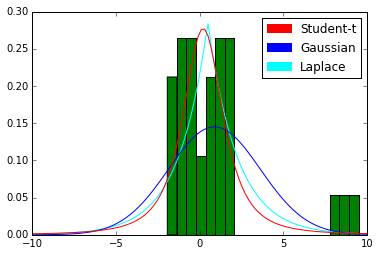

In [30]:
red_patch = mpatches.Patch(color='red', label='Student-t')
blue_patch = mpatches.Patch(color='blue', label='Gaussian')
cyan_patch = mpatches.Patch(color='cyan', label='Laplace')
plt.legend(handles=[red_patch, blue_patch, cyan_patch])
plt.hist(ext_data, bins = 20, normed = True, color = 'green')
plt.plot(x, laplace.pdf(x, loc_lap, scale_lap), 'cyan')
plt.plot(x, norm.pdf(x, loc_norm, scale_norm), 'blue')
plt.plot(x, t.pdf(x, shape_t, loc_t, scale_t), 'red')
plt.show()

Laplace and Student-t are less affected by outliers than the Gaussian.

### 4. Gamma distribution
The gamma distribution is defined over a positive random variable and is defined by 2 parameters: the shape a > 0 and the rate b > 0:
$ \hspace{35pt} Gam(T\mid a, b) = \frac{b^a}{\Gamma(a)} T^{a-1} e^{-Tb} $, where 
       
$ \hspace{35pt} \Gamma(a) = \int_{0}^{\infty} u^{x-1} e^{-u} $ is called the gamma function.

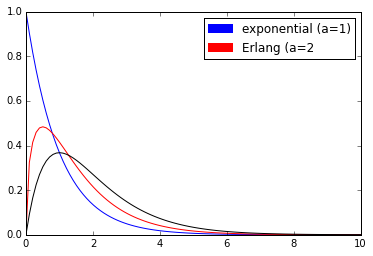

In [31]:
x = np.linspace(0, 10, 100)
blue_patch = mpatches.Patch(color='blue', label='exponential (a=1)')
red_patch = mpatches.Patch(color='red', label='Erlang (a=2')
plt.legend(handles=[blue_patch, red_patch])

plt.plot(x, gamma.pdf(x, a = 1, loc = 0, scale = 1), 'blue')
plt.plot(x, gamma.pdf(x, a = 1.5, loc = 0, scale = 1), 'red')
plt.plot(x, gamma.pdf(x, a = 2.0, loc = 0, scale = 1), 'black')
plt.show()

The <b>exponential</b> distribution is a special case of the Gamma distribution when a = 1. It can be used to model the times between events in a Poisson process (TODO: you can read more about it here https://en.wikipedia.org/wiki/Exponential_distribution#Applications_of_exponential_distribution)
                             
The <b>Erlang</b> distribution is a special case of the Gamma distribution when a = 2.    

The Gamma distribution is the <b>conjugate prior</b> for a <b>likelihood</b> modeled using the Poisson distribution. 

In Bayesian inference $P(\theta | data) \propto P(data | \theta) * P(\theta) $ (<b>posterior probability</b> = <b>likelihood</b> * <b>prior probability</b>)

The conjugate prior is a convenient prior probability that, when multiplied with the likelihood, gives a posterior of the same form as the prior. This is helpful for keeping the problem of updating our beliefs tractable.

### 5. Beta distribution

The <b>beta</b> distribution is used for modelling binary events. It is the <b>conjugate prior</b> for the <b>Bernoulli</b> and <b>binomial</b> distributions. It has the following probability density function:
$$ Beta(x|a, b) = \frac{\Gamma(a)\ \Gamma(b)}{\Gamma(a+b)} x^{a-1}(1-x)^{b-1} $$

The a and b parameters can be interpreted as the prior number of observations for x = 1 and x = 0.

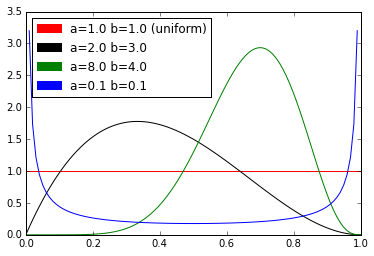

In [77]:
x = np.linspace(0, 1, 100)
red_patch = mpatches.Patch(color='red', label='a=1.0 b=1.0 (uniform)')
black_patch = mpatches.Patch(color='black', label='a=2.0 b=3.0')
green_patch = mpatches.Patch(color='green', label='a=8.0 b=4.0')
blue_patch = mpatches.Patch(color='blue', label='a=0.1 b=0.1')
plt.legend(loc = 'upper left', handles=[red_patch, black_patch, green_patch, blue_patch])
plt.plot(x, beta.pdf(x, 1, 1), 'red')
plt.plot(x, beta.pdf(x, 2, 3), 'black')
plt.plot(x, beta.pdf(x, 8, 4), 'green')
plt.plot(x, beta.pdf(x, 0.1, 0.1), 'blue')
plt.show()

a = 1 and b = 1 give the <b>uniform</b> distribution, shown in red.

### 6. Dirichlet
The <b>Dirichlet</b> distribution is the probability that K rival events are $x_i$, given that each one has been observed $\alpha_i - 1$ times. It is a generalization of the <b>Beta</b> distribution and is used as a <b>conjugate prior</b> for the <b>categorical</b> and <b>multinomial</b> distributions. It has the following probability density function:
$$ Dir(x|\alpha) = \frac{\Gamma\left(\sum_i \alpha_i\right)}{\prod_i \Gamma(\alpha_i)} \prod_{i=1}^k x_i^{\alpha_i-1} $$
where $$ \sum_{i=1}^{k} x_i = 1 $$

### 7. Pareto distribution
The <b>Pareto</b> distribution is used to model certain phenomena/data that exhibits <b>long tails</b>, such as wealth allocation or word frequencies in a language (more applications here https://en.wikipedia.org/wiki/Pareto_distribution#Applications)
It has the following probability density function:
$$ Pareto(x|k, m) = \frac{km^k}{x^{k+1}} I(x\ge m) $$

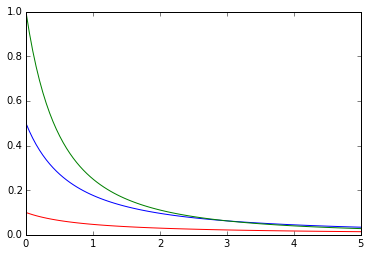

In [101]:
x = np.linspace(0, 5, 100)
plt.plot(x, pareto.pdf(x, 0.1, loc = -1), 'red')
plt.plot(x, pareto.pdf(x, 0.5, loc = -1), 'blue')
plt.plot(x, pareto.pdf(x, 1.0, loc = -1), 'green')
plt.show()

### Exercises

### 1. Central limit theorem

This exercise is an illustration of the central limit theorem and it provides an intuition as to why the <b>Gaussian</b> distribution is so important.
By summing/averaging random variables (identically and independently distributed), we approach a Gaussian distribution.

In [ ]:
dist = beta(0.1, 0.1)
for num_variables in range(1, 10):
    #draw 10000 samples from each variable 
    samples = []
    for j in range(num_variables):
        #TODO
    
    #compute the mean of the num_variables for each of the 10000 samples => 10000 means
    means = []
    #TODO
        
    #plot a histogram of the means
    plt.hist(means, bins = 20)
    plt.show()

Try different parameters for the beta distribution and rerun the experiments. Try a different distribution. You should reach the same results.